<p style="color:blue; font-family:Georgia; text-align:center; font-size:3em;">Weather History Apparent Temperature Regression</p>


# Table of Contents
1. [Intro](#1)
1. [Importing Libraries](#2)
1. [Load cleaned data and Explore the selection of various feature](#3)
1. [Perform various regression](#4)
1. [Final Model](#5)
1. [My Models](#6)



by : Ahmed Nabil Ibrahim Awaad

<a id="1"></a>
# INTRO

> Given a cleaned weather history dataset

*  Required

*  3- Explore the selection of various feature variables for regression to estimate the apparent temperature.  You should include at least one categorical feature.

*  4- Perform various regression analysis using various methods explored in ML1 (Linear regression, Multiple regression, SVR regression, Polynomial regression). Explore using different model parameters in the built-in sklearn libraries.

* 5- Explore the use of your own implementations of each Model. Comment on your results.
* 6- For each model provide suitable quantitative metrics for assessing the performance of your model based on the required application

<a id="2"></a>
# Import Libraries

In [1]:
# import libraries
import numpy as np
import scipy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# preprosessing
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.pipeline import make_pipeline

# metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_squared_log_error
from sklearn.metrics import classification_report

#model
from sklearn.linear_model import LinearRegression, ElasticNet, Lasso, Ridge,  BayesianRidge, LassoLarsIC
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor, AdaBoostRegressor
from sklearn.kernel_ridge import KernelRidge
from xgboost import XGBRegressor
from catboost import CatBoostRegressor


#settings
pd.set_option('display.max_columns', None)
%matplotlib inline

<a id="3"></a>
# Load cleaned data and Explore the selection of various feature

In [2]:
weather_df = pd.read_csv("01_weatherHistory_cleaned.csv")
weather_df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),month,hour
0,2006-03-31 22:00:00+00:00,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,1015.13,3,22
1,2006-03-31 23:00:00+00:00,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,1015.63,3,23
2,2006-04-01 00:00:00+00:00,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,1015.94,4,0
3,2006-04-01 01:00:00+00:00,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,1016.41,4,1
4,2006-04-01 02:00:00+00:00,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,1016.51,4,2


In [3]:
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95912 entries, 0 to 95911
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            95912 non-null  object 
 1   Summary                   95912 non-null  object 
 2   Precip Type               95912 non-null  object 
 3   Temperature (C)           95912 non-null  float64
 4   Apparent Temperature (C)  95912 non-null  float64
 5   Humidity                  95912 non-null  float64
 6   Wind Speed (km/h)         95912 non-null  float64
 7   Wind Bearing (degrees)    95912 non-null  float64
 8   Visibility (km)           95912 non-null  float64
 9   Pressure (millibars)      95912 non-null  float64
 10  month                     95912 non-null  int64  
 11  hour                      95912 non-null  int64  
dtypes: float64(7), int64(2), object(3)
memory usage: 8.8+ MB


In [4]:
weather_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Temperature (C),95912.0,11.937975,9.569620,-21.822222,4.594444,12.022222,18.844444,39.905556
Apparent Temperature (C),95912.0,10.859194,10.716711,-27.716667,2.272222,12.022222,18.844444,39.344444
Humidity,95912.0,0.734844,0.195717,0.000000,0.600000,0.780000,0.890000,1.000000
Wind Speed (km/h),95912.0,10.806764,6.920504,0.000000,5.812100,9.933700,14.135800,63.852600
Wind Bearing (degrees),95912.0,187.506986,107.378309,0.000000,116.000000,180.000000,290.000000,359.000000
Visibility (km),95912.0,10.362306,4.174204,0.000000,8.355900,10.046400,14.812000,16.100000
Pressure (millibars),95912.0,1016.796439,7.718585,973.780000,1012.190000,1016.420000,1021.050000,1046.380000
month,95912.0,6.511792,3.449894,1.000000,4.000000,7.000000,9.000000,12.000000
hour,95912.0,11.497915,6.922062,0.000000,5.000000,11.000000,17.000000,23.000000


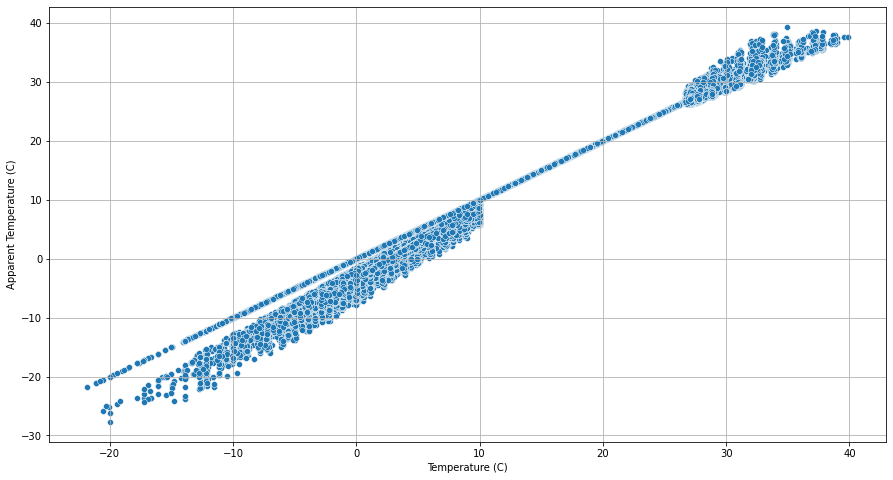

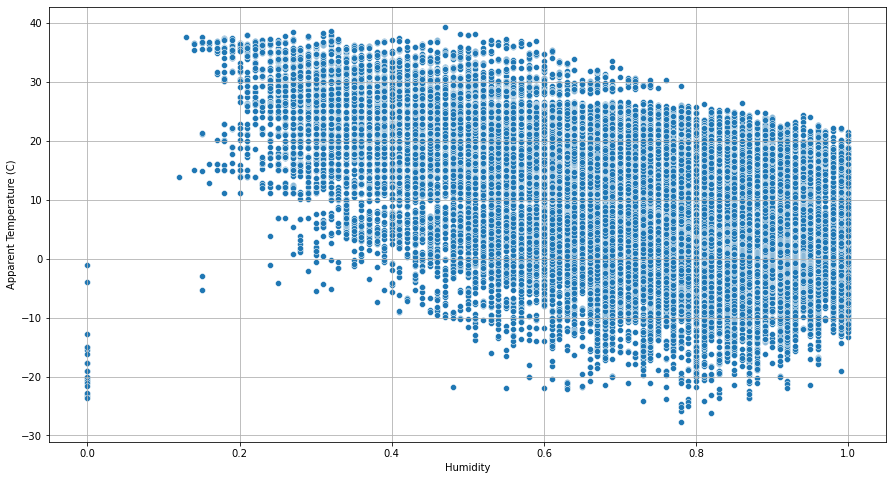

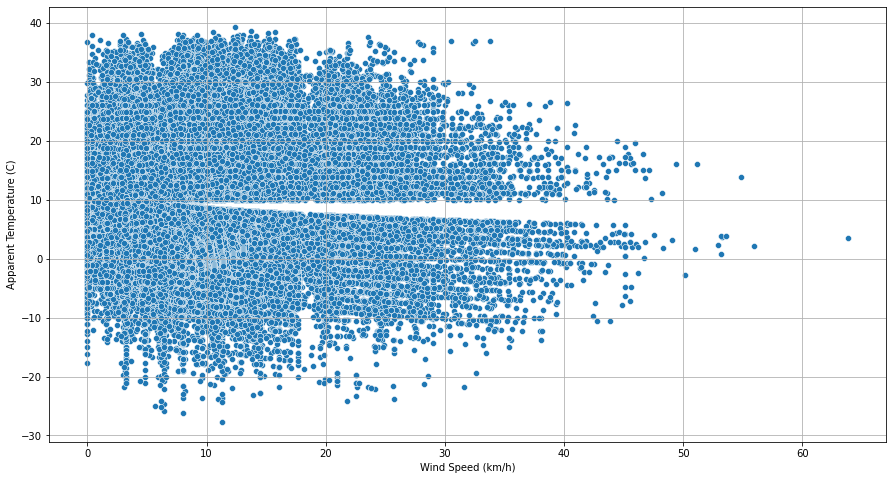

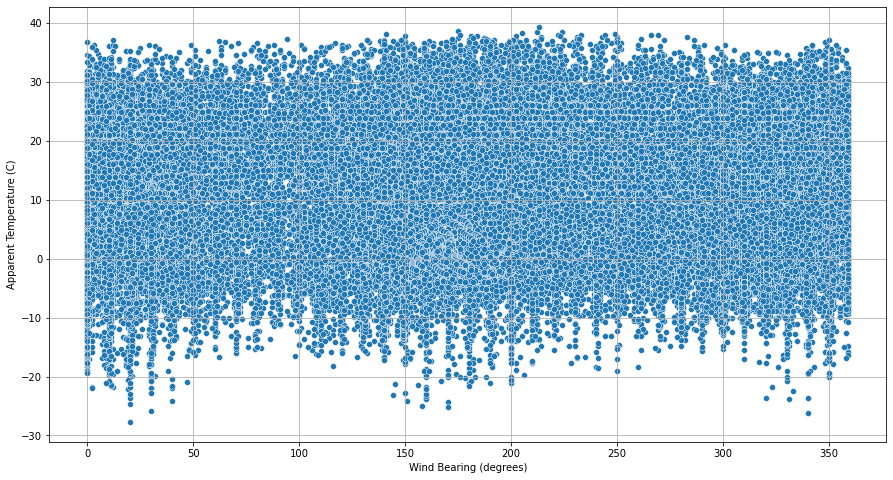

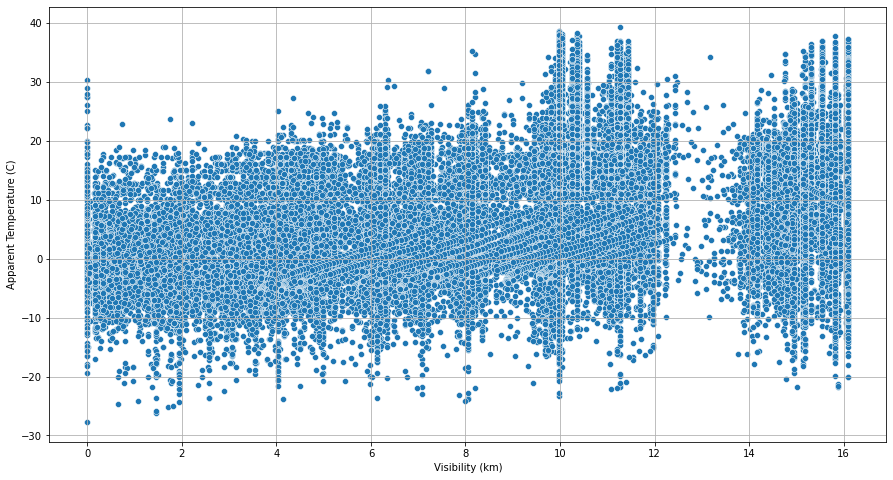

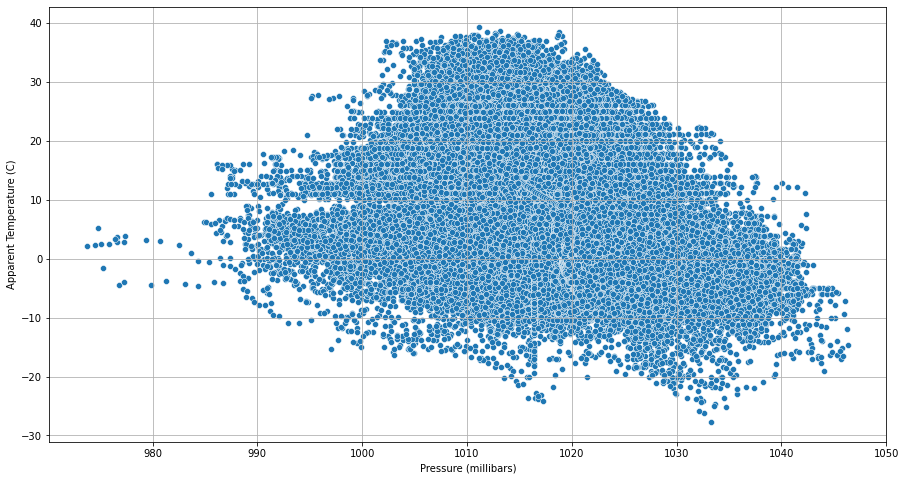

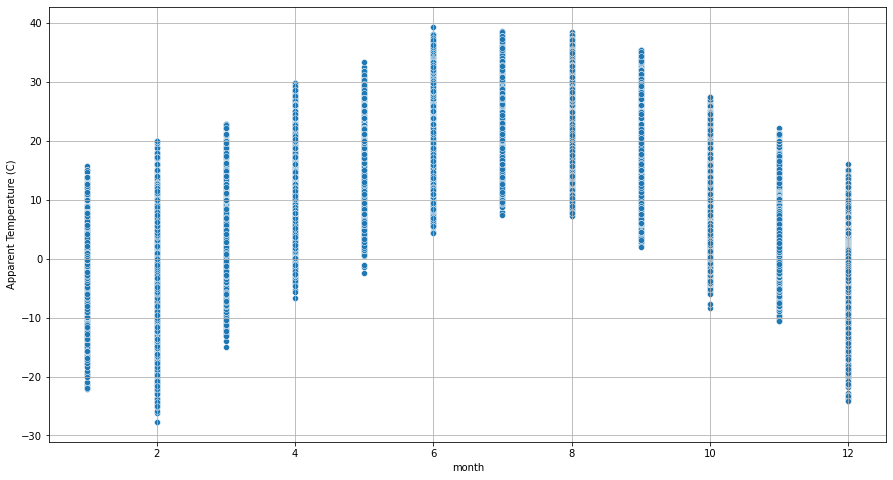

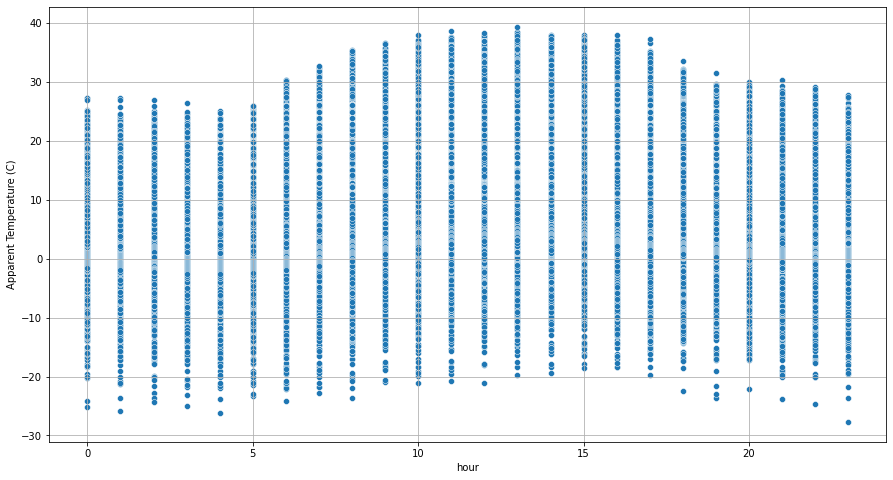

In [5]:
columns_lst = ['Temperature (C)','Humidity', 'Wind Speed (km/h)',
               'Wind Bearing (degrees)', 'Visibility (km)', 'Pressure (millibars)',
               'month', 'hour']
for feature in columns_lst:
    plt.subplots(figsize=(15,8))
    sns.scatterplot(x=feature, y='Apparent Temperature (C)', data=weather_df)
    plt.grid();

In [6]:
# lets create categorical feature from hour
weather_df['hour_cat'] = pd.cut(weather_df['hour'], bins=[-1, 5, 8, 10, 17, 20, float('Inf')], labels=[1, 2, 3, 4, 5, 6])

In [7]:
weather_df.groupby(['Summary'])['Apparent Temperature (C)'].agg(['mean', 'count']).sort_values(by='mean')

,mean,count
Summary,,
Breezy and Foggy,-7.403492,35
Foggy,-0.229669,7117
Windy,2.009028,8
Breezy,3.387654,54
Dangerously Windy and Partly Cloudy,3.483333,1
Breezy and Overcast,3.492235,528
Windy and Overcast,3.696543,45
Overcast,5.771392,16516
Windy and Partly Cloudy,6.551244,67


In [8]:
# encode the summary
weather_df['summary_1'] = np.where(weather_df.Summary.isin(['Breezy and Foggy',
                                                            'Foggy']), 1,0)

weather_df['summary_2'] = np.where(weather_df.Summary.isin(['Windy',
                                                            'Breezy',
                                                            'Dangerously Windy and Partly Cloudy',
                                                            'Breezy and Overcast',
                                                            'Windy and Overcast']), 1,0)

weather_df['summary_3'] = np.where(weather_df.Summary.isin(['Overcast',
                                                            'Windy and Partly Cloudy']), 1,0)

weather_df['summary_4'] = np.where(weather_df.Summary.isin(['Light Rain',
                                                            'Breezy and Mostly Cloudy',
                                                            'Rain',
                                                            'Windy and Mostly Cloudy',
                                                            'Windy and Foggy',
                                                            'Breezy and Partly Cloudy']), 1,0)

weather_df['summary_5'] = np.where(weather_df.Summary.isin(['Drizzle',
                                                            'Clear',
                                                            'Mostly Cloudy']), 1,0)

weather_df['summary_6'] = np.where(weather_df.Summary.isin(['Partly Cloudy']), 1,0)

weather_df['summary_7'] = np.where(weather_df.Summary.isin(['Humid and Mostly Cloudy',
                                                            'Breezy and Dry',
                                                            'Humid and Overcast',
                                                            'Humid and Partly Cloudy',
                                                            'Dry and Mostly Cloudy',
                                                            'Dry and Partly Cloudy',
                                                            'Windy and Dry',
                                                            'Dry']), 1,0)

In [9]:
# encode category variables using one hot encoder
columns_to_encode =['Precip Type','month', 'hour_cat']
weather_df = pd.get_dummies(weather_df, columns=columns_to_encode, drop_first=True)

In [10]:
# scale the numeric features

columns_to_scale = ['Temperature (C)',
                    'Humidity',
                    'Wind Speed (km/h)',
                    'Wind Bearing (degrees)',
                    'Visibility (km)',
                    'Pressure (millibars)',
                    ]

scaler_model = MinMaxScaler()
scaler_model = scaler_model.fit(weather_df[columns_to_scale])
weather_df[columns_to_scale]  = scaler_model.transform(weather_df[columns_to_scale])

y_scaler = MinMaxScaler()
y_scaler = y_scaler.fit(weather_df[['Apparent Temperature (C)']])
weather_df['Apparent Temperature (C)']  = y_scaler.transform(weather_df[['Apparent Temperature (C)']])


In [11]:
weather_df.head()

,Formatted Date,Summary,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),hour,summary_1,summary_2,summary_3,summary_4,summary_5,summary_6,summary_7,Precip Type_snow,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,hour_cat_2,hour_cat_3,hour_cat_4,hour_cat_5,hour_cat_6
0,2006-03-31 22:00:00+00:00,Partly Cloudy,0.506975,0.523486,0.89,0.221130,0.699164,0.983,0.569559,22,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2006-03-31 23:00:00+00:00,Partly Cloudy,0.505085,0.521084,0.86,0.223399,0.721448,0.983,0.576446,23,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,2006-04-01 00:00:00+00:00,Mostly Cloudy,0.505445,0.553144,0.89,0.061523,0.568245,0.929,0.580716,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2006-04-01 01:00:00+00:00,Partly Cloudy,0.487805,0.501947,0.83,0.220877,0.749304,0.983,0.587190,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2006-04-01 02:00:00+00:00,Mostly Cloudy,0.495365,0.517356,0.83,0.172970,0.721448,0.983,0.588567,2,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


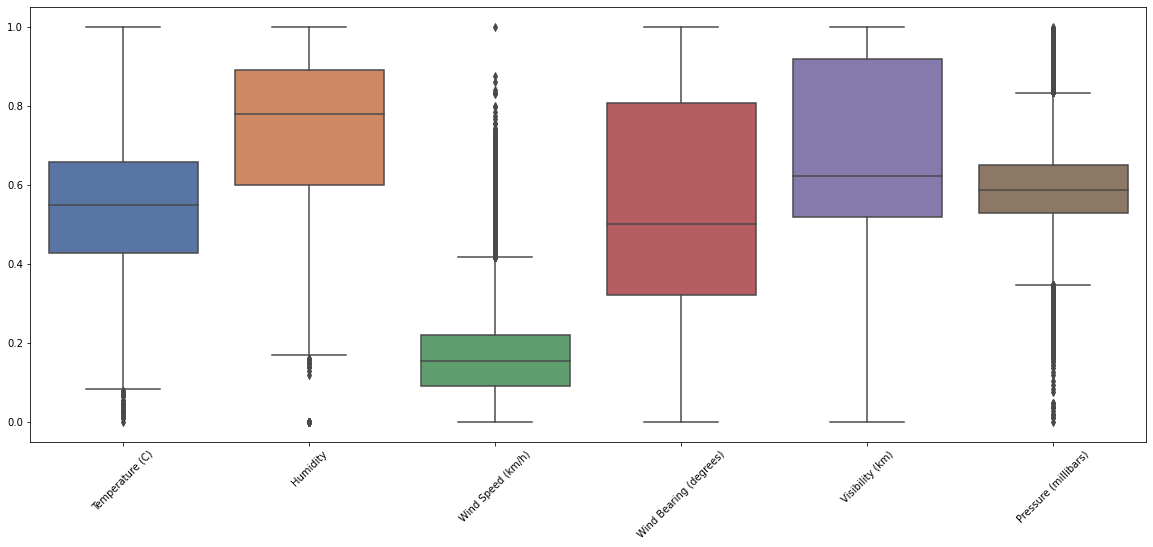

In [12]:
plt.figure(figsize=(20,8))
plt.xticks(rotation=45)
sns.boxplot(data=weather_df[columns_to_scale], palette="deep");

In [13]:
corr_with_aptemp = weather_df.corr()['Apparent Temperature (C)'].drop('Apparent Temperature (C)')
corr_with_aptemp

Temperature (C)           0.992634
Humidity                 -0.602460
Wind Speed (km/h)        -0.057061
Wind Bearing (degrees)    0.028846
Visibility (km)           0.382675
Pressure (millibars)     -0.285843
hour                      0.095722
summary_1                -0.294649
summary_2                -0.056265
summary_3                -0.216929
summary_4                -0.015794
summary_5                 0.046995
summary_6                 0.297475
summary_7                 0.059443
Precip Type_snow         -0.566085
month_2                  -0.309430
month_3                  -0.164637
month_4                   0.036272
month_5                   0.166727
month_6                   0.277045
month_7                   0.345313
month_8                   0.324899
month_9                   0.182826
month_10                 -0.001445
month_11                 -0.163281
month_12                 -0.336867
hour_cat_2               -0.017477
hour_cat_3                0.079182
hour_cat_4          

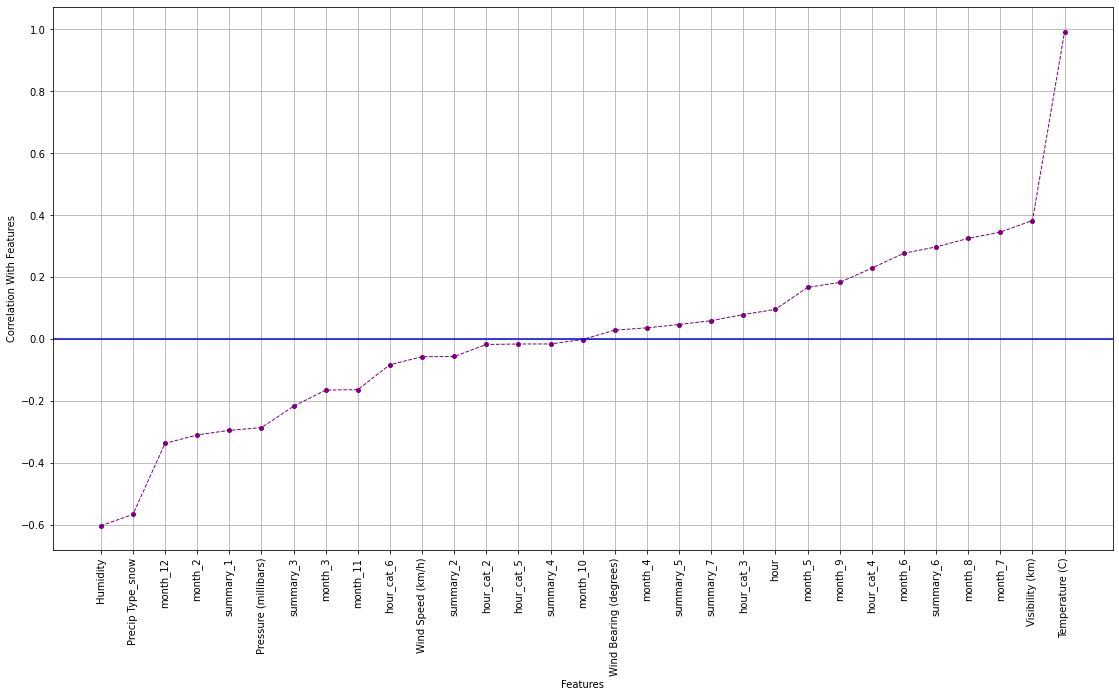

In [14]:
plt.subplots(figsize=(19,10))
plt.grid()
plt.plot((corr_with_aptemp.sort_values()), color="purple", lw=1, ls='--', marker='o', markersize=4)
plt.xticks(rotation=90)
plt.axhline(y=0 , c='b')
plt.xlabel('Features')
plt.ylabel('Correlation With Features')
plt.show()

<a id="4"></a>
# Perform various regression



## Linear regression


In [15]:
# try linear regression between temp and Apparent temp
X =weather_df[['Temperature (C)']]
y =weather_df['Apparent Temperature (C)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
linear_model  = LinearRegression()
cross_lr = cross_val_score(linear_model, X_train, y_train, cv=5)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


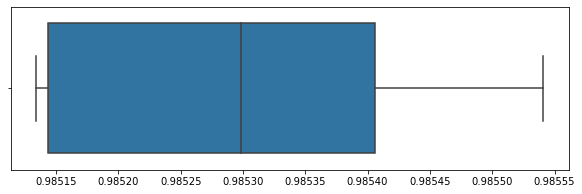

In [17]:
plt.subplots(figsize=(10,3))
sns.boxplot(cross_lr)
plt.show()

## Multiple regression

### lets choose the features with lasso regression

In [18]:
# Low corrlation between wind bearing and apparent temperature
features = ['Temperature (C)',
                'Humidity',
                'Wind Speed (km/h)',
                'Visibility (km)',
                'Pressure (millibars)',
                'Precip Type_snow',
                'summary_1', 'summary_2', 'summary_3', 'summary_4', 'summary_5', 'summary_6', 'summary_7',
                'month_2', 'month_3', 'month_4', 'month_5', 'month_6',
                'month_7', 'month_8', 'month_9', 'month_10', 'month_11', 'month_12',
                'hour_cat_2', 'hour_cat_3','hour_cat_4', 'hour_cat_5', 'hour_cat_6'
        ]

X =weather_df[features]
y =weather_df['Apparent Temperature (C)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
X_train.head(2)

,Temperature (C),Humidity,Wind Speed (km/h),Visibility (km),Pressure (millibars),Precip Type_snow,summary_1,summary_2,summary_3,summary_4,summary_5,summary_6,summary_7,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,hour_cat_2,hour_cat_3,hour_cat_4,hour_cat_5,hour_cat_6
21336,0.640446,0.90,0.175240,0.926,0.589394,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
81985,0.435244,0.96,0.219617,0.039,0.529752,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [20]:
lasso_model = Lasso()
search = GridSearchCV(lasso_model,
                    {'alpha':np.array([0.00001, 0.0001, 0.001, 0.01, 0.1,])},
                    cv = 5, scoring="neg_mean_squared_error",  )

In [21]:
search.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': array([1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01])},
             scoring='neg_mean_squared_error')

In [22]:
search.best_params_

{'alpha': 1e-05}

In [23]:
search.score(X_test, y_test)

-0.00022749989058864521

In [24]:
coefficients = search.best_estimator_.coef_
importance = np.abs(coefficients)

In [25]:

imp_df = pd.DataFrame({'feature':np.array(features),'importance':importance, }).sort_values(by='importance', ascending=False)

<AxesSubplot:xlabel='importance', ylabel='feature'>

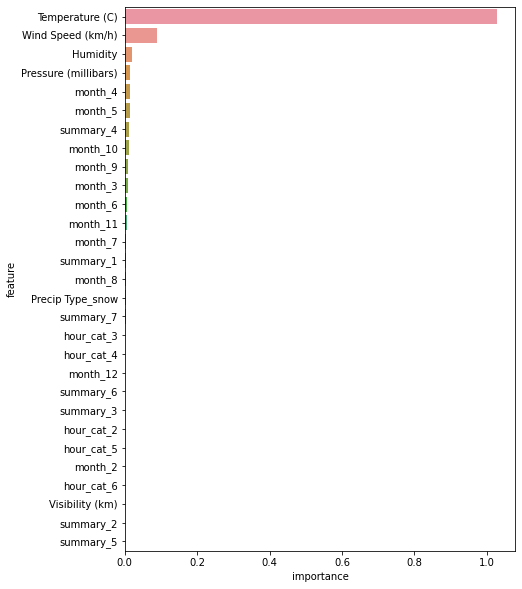

In [26]:
plt.subplots(figsize=(7,10))
sns.barplot(data=imp_df, y='feature', x='importance')

In [27]:
np.array(features)[importance > 0]

array(['Temperature (C)', 'Humidity', 'Wind Speed (km/h)',
       'Pressure (millibars)', 'Precip Type_snow', 'summary_1',
       'summary_3', 'summary_4', 'summary_6', 'summary_7', 'month_2',
       'month_3', 'month_4', 'month_5', 'month_6', 'month_7', 'month_8',
       'month_9', 'month_10', 'month_11', 'month_12', 'hour_cat_2',
       'hour_cat_3', 'hour_cat_4', 'hour_cat_5', 'hour_cat_6'],
      dtype='<U20')

In [28]:
# new features
features = np.array(features)[importance > 0]

X =weather_df[features]
y =weather_df['Apparent Temperature (C)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
models = {
            "LR"    : LinearRegression(),
            "Lasso" : Lasso(alpha=0.00001),
            "Ridge" : Ridge(),
            "KNNR"  : KNeighborsRegressor(), 
            "SVR"   : SVR(),
            "DT"    : DecisionTreeRegressor(),
            "RF"    : RandomForestRegressor(),
            "XGBR"  : XGBRegressor(),
            "catboost" : CatBoostRegressor()
            }

In [30]:
results = []
for name, model in models.items():
    print('{0:25} : {1:5}'.format('Model name', name ) )
    
#     scores = cross_validation(train_df, model)
#     print('{0:25} : {1:5}'.format('R^2 cross-validation', np.mean(scores) ) )
    
    model.fit(X_train, y_train)
    Training_Score = model.score(X_train, y_train)
    Test_Score = model.score(X_test, y_test)
    

    print('{0:25} : {1:5}'.format('R^2 Training Score',  Training_Score) )
    print('{0:25} : {1:5}'.format('R^2 Test Score',  Test_Score) )
    
    print('-'*50 + '\n')
    
    temp ={'Name':name,'Training_Score':Training_Score, 'Test_Score':Test_Score}
    results.append(temp)

Model name                : LR   
R^2 Training Score        : 0.9910572455748914
R^2 Test Score            : 0.9911478429251712
--------------------------------------------------

Model name                : Lasso
R^2 Training Score        : 0.9910474573398016
R^2 Test Score            : 0.9911327667256395
--------------------------------------------------

Model name                : Ridge
R^2 Training Score        : 0.9910549512228921
R^2 Test Score            : 0.9911440420166524
--------------------------------------------------

Model name                : KNNR 
R^2 Training Score        : 0.986796465695586
R^2 Test Score            : 0.9782887381280426
--------------------------------------------------

Model name                : SVR  
R^2 Training Score        : 0.9424735124721346
R^2 Test Score            : 0.9428496027670725
--------------------------------------------------

Model name                : DT   
R^2 Training Score        :   1.0
R^2 Test Score            : 0.999

In [31]:
results_df = pd.DataFrame(results)
results_df 

,Name,Training_Score,Test_Score
0,LR,0.991057,0.991148
1,Lasso,0.991047,0.991133
2,Ridge,0.991055,0.991144
3,KNNR,0.986796,0.978289
4,SVR,0.942474,0.942850
5,DT,1.000000,0.999927
6,RF,0.999995,0.999962
7,XGBR,0.999963,0.999937
8,catboost,0.999845,0.999743


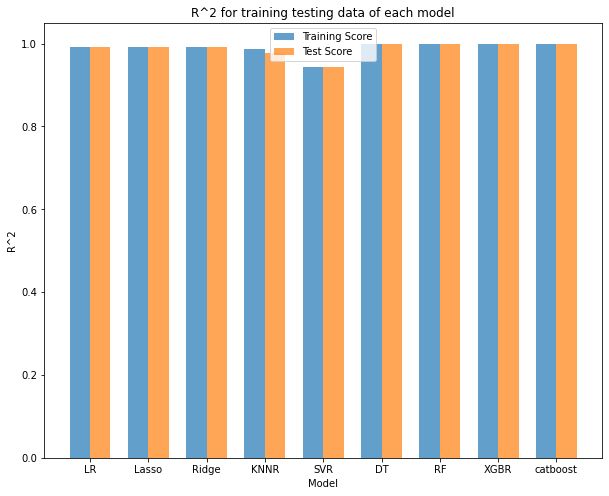

In [32]:
plt.subplots(figsize=(10,8))
ind = np.arange(len(results_df['Name']))  # the x locations for the groups
width = 0.35       # the width of the bars

plt.bar(x=ind,
        height=results_df['Training_Score'],
        width=width,
        alpha=.7,
        label='Training Score')

plt.bar(x=ind+width,
        height=results_df['Test_Score'],
        width=width,
        alpha=.7,
        label='Test Score')

# title and labels
plt.ylabel('R^2')
plt.xlabel('Model')
plt.title('R^2 for training testing data of each model')
locations = ind + width / 2  # xtick locations
labels = results_df['Name']  # xtick labels
plt.xticks(locations, labels)
# legend
plt.legend()

In [33]:
## Polynomial regression

In [34]:
#Fitting the Polynomial regression to the dataset
poly_regs= PolynomialFeatures(degree= 2)
x_poly= poly_regs.fit_transform(X_train)

In [35]:
poly_model  = LinearRegression()
cross_poly = cross_val_score(linear_model, x_poly, y_train, cv=5)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


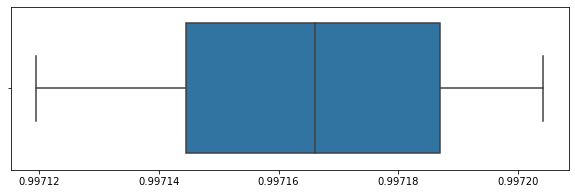

In [36]:
plt.subplots(figsize=(10,3))
sns.boxplot(cross_poly)
plt.show()

### The accuracy of poly model is better than the linear model

<a id="5"></a>
# Final Model

In [37]:
# get the best model
results_df[results_df.Test_Score == np.max(results_df.Test_Score)]

,Name,Training_Score,Test_Score
6,RF,0.999995,0.999962


### the best model is random forest (ensemble model) so we will use it

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


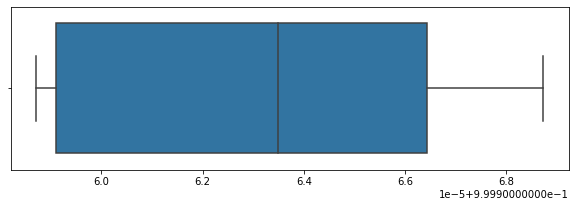

In [38]:
# Final model
RF_model = RandomForestRegressor()

# create cross val
cross_RF = cross_val_score(RF_model, X_train, y_train, cv=5)

plt.subplots(figsize=(10,3))
sns.boxplot(cross_RF)
plt.show()

In [39]:
cross_RF


array([0.99996643, 0.99996349, 0.99995871, 0.99996873, 0.99995911])

In [40]:
RF_model.fit(X_train, y_train)

RandomForestRegressor()

In [41]:
# define model to get adjusted R^2
def adj_rsquared(X, y_actual, y_pred):
    r2 = r2_score(y_actual,y_pred)
    N=X.shape[0]
    p=X.shape[1]
    x = (1-r2)
    y = (N-1) / (N-p-1)
    adj_rs = (1 - (x * y))
    return adj_rs

In [42]:
# Train the model
print('{0:25} : {1:5}'.format('Model name', 'score' ) )

print('{0:25} : {1:5}'.format('R^2 Training Score', RF_model.score(X_train, y_train) ) )
print('{0:25} : {1:5}'.format('R^2 Test Score', RF_model.score(X_test, y_test) ) )
#-------------------------------------------------------------------#
y_test_predict = model.predict(X_test)
y_test_unscaled = y_scaler.inverse_transform(pd.DataFrame(y_test))
y_test_predict_unscaled = y_scaler.inverse_transform(pd.DataFrame(y_test_predict))

adj_rs_test = adj_rsquared(X_train, y_test_unscaled, y_test_predict_unscaled)
#-------------------------------------------------------------------#
print('{0:25} : {1:5}'.format('R^2 adjusted Test Score', adj_rs_test ) )

#-------------------------------------------------------------------#
print('{0:25} : {1:5}'.format('RMSE Test Score',np.sqrt(mean_squared_error(y_test_unscaled, y_test_predict_unscaled)) ) )
print('{0:25} : {1:5}'.format('MAE Test Score', mean_absolute_error(y_test_unscaled, y_test_predict_unscaled)) ) 
print('-'*50 + '\n')

Model name                : score
R^2 Training Score        : 0.9999949496170645
R^2 Test Score            : 0.9999600838570459
R^2 adjusted Test Score   : 0.9997429816501402
RMSE Test Score           : 0.17218170284098044
MAE Test Score            : 0.08156472198914148
--------------------------------------------------



### This multiply model is very accurate adjusted R^2 is 0.999 and MAE is 0.08 degree

In [43]:
# lets try linear model with temperature only
# linear model
linear_model = XGBRegressor()
linear_model.fit(X_train[['Temperature (C)']], y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [44]:
# Train the model
print('{0:25} : {1:5}'.format('Model name', 'score' ) )

print('{0:25} : {1:5}'.format('R^2 Training Score', linear_model.score(X_train[['Temperature (C)']], y_train) ) )
print('{0:25} : {1:5}'.format('R^2 Test Score', linear_model.score(X_test[['Temperature (C)']], y_test) ) )
#-------------------------------------------------------------------#
y_test_predict = linear_model.predict(X_test[['Temperature (C)']])
y_test_unscaled = y_scaler.inverse_transform(pd.DataFrame(y_test))
y_test_predict_unscaled = y_scaler.inverse_transform(pd.DataFrame(y_test_predict))

adj_rs_test = adj_rsquared(X_train[['Temperature (C)']], y_test_unscaled, y_test_predict_unscaled)
#-------------------------------------------------------------------#
print('{0:25} : {1:5}'.format('R^2 adjusted Test Score', adj_rs_test ) )

#-------------------------------------------------------------------#
print('{0:25} : {1:5}'.format('RMSE Test Score',np.sqrt(mean_squared_error(y_test_unscaled, y_test_predict_unscaled)) ) )
print('{0:25} : {1:5}'.format('MAE Test Score', mean_absolute_error(y_test_unscaled, y_test_predict_unscaled)) ) 
print('-'*50 + '\n')

Model name                : score
R^2 Training Score        : 0.9896822790997292
R^2 Test Score            : 0.9888282072948645
R^2 adjusted Test Score   : 0.9888280616376083
RMSE Test Score           : 1.1353766630135782
MAE Test Score            : 0.6487921894805804
--------------------------------------------------



### Accuracy still good with temperatue only

In [45]:
from statsmodels.api import OLS
#
OLS(y_train, X_train).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    OLS Regression Results                                   
=============================================================================================
Dep. Variable:     Apparent Temperature (C)   R-squared (uncentered):                   0.999
Model:                                  OLS   Adj. R-squared (uncentered):              0.999
Method:                       Least Squares   F-statistic:                          4.607e+06
Date:                      Sat, 09 Oct 2021   Prob (F-statistic):                        0.00
Time:                              21:12:00   Log-Likelihood:                      2.1283e+05
No. Observations:                     76729   AIC:                                 -4.256e+05
Df Residuals:                         76703   BIC:                                 -4.254e+05
Df Model:                                26                                                  
Covariance Type:                  nonrobust                                                  
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Temperature (C)          1.0231      0.001   1540.143      0.000       1.022       1.024
Humidity                 0.0184      0.000     62.538      0.000       0.018       0.019
Wind Speed (km/h)       -0.0907      0.001   -161.837      0.000      -0.092      -0.090
Pressure (millibars)     0.0153      0.000     32.517      0.000       0.014       0.016
Precip Type_snow        -0.0029      0.000    -13.334      0.000      -0.003      -0.003
summary_1                0.0039      0.000     16.309      0.000       0.003       0.004
summary_3               -0.0008      0.000     -4.634      0.000      -0.001      -0.000
summary_4                0.0135      0.001     23.713      0.000       0.012       0.015
summary_6               -0.0013      0.000     -9.757      0.000      -0.002      -0.001
summary_7               -0.0076      0.001     -6.239      0.000      -0.010      -0.005
month_2                  0.0003      0.000      1.173      0.241      -0.000       0.001
month_3                  0.0092      0.000     33.681      0.000       0.009       0.010
month_4                  0.0167      0.000     54.806      0.000       0.016       0.017
month_5                  0.0151      0.000     45.900      0.000       0.014       0.016
month_6                  0.0094      0.000     26.211      0.000       0.009       0.010
month_7                  0.0064      0.000     16.894      0.000       0.006       0.007
month_8                  0.0051      0.000     13.831      0.000       0.004       0.006
month_9                  0.0119      0.000     35.538      0.000       0.011       0.013
month_10                 0.0125      0.000     41.313      0.000       0.012       0.013
month_11                 0.0067      0.000     23.746      0.000       0.006       0.007
month_12                -0.0006      0.000     -2.405      0.016      -0.001      -0.000
hour_cat_2               0.0010      0.000      4.914      0.000       0.001       0.001
hour_cat_3               0.0026      0.000     10.982      0.000       0.002       0.003
hour_cat_4               0.0024      0.000     12.853      0.000       0.002       0.003
hour_cat_5               0.0009      0.000      4.592      0.000       0.001       0.001
hour_cat_6               0.0005      0.000      2.895      0.004       0.000       0.001
==============================================================================
Omnibus:                     4137.255   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5404.870
Skew:                           0.525   Prob(JB):                         0.00
Kurtosis:            

### we can remove this features with high p_value and re run the model

<a id="6"></a>
# My Models

### linear regression

In [46]:
from mylib import Linear_Regression_Batch_GD

In [47]:
my_linreg = Linear_Regression_Batch_GD(alpha=0.6)
my_linreg.fit(X_train.values, y_train)

# get R_2 score
my_linreg.r2_score(X_train.values, y_train)

0.9763588473831653

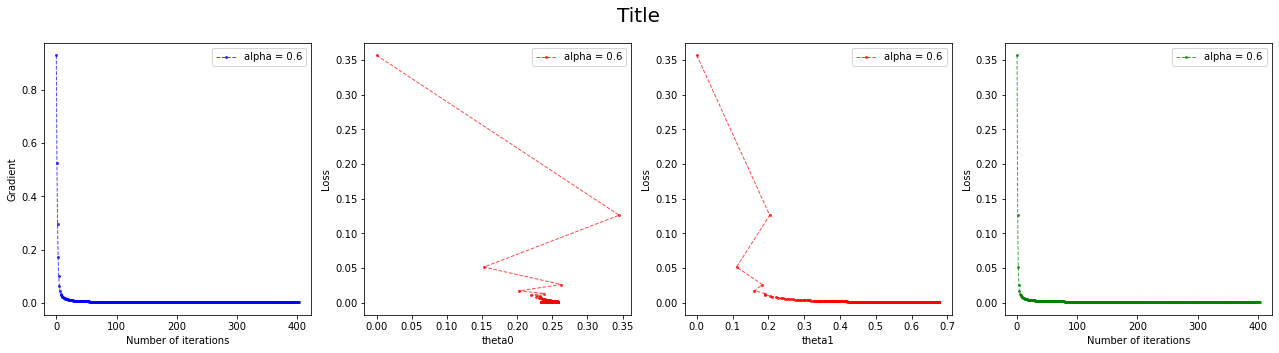

In [48]:
# plot loss,gradient curves and theta0, theta1
my_linreg.plot_all()